<a href="https://colab.research.google.com/github/JPFphysics/15c-lab/blob/master/waves_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measuring the Speed of Sound #
(in a pipe)

Sound travels as a longitudinal wave through air. Musical instruments create sound at specific frequencies by driving standing waves. We get standing waves by driving a material at the correct resonance frequency for its boundary conditions. What we mean by that, is that only certain whole numbers of wavelengths at the correct frequencies will physically fit inside the resonating medium. For example, if you have a string of length $n$ you can only fit wavelengths that are whole number fractions of its length (1, 1/2, 1/3, etc.).



## Harmonics ##
We will study sound inside a pipe, which is more similar to brass and woodwind instruments. <span style="color:red;"> What kind of boundary conditions exist in a pipe? Does this change if you close one end? > <\span>

What is the relationship between pipe length, wavelength, harmonic number?

## Speed of Sound ##
The speed of sound depends on the medium and boundary conditions. For example, sound moves faster in a solid than in air. The speed of sound will be different in some kind of chamber (or pipe) than in free space.

Regardless of the medium, there is a fixed relationship between the speed of sound, frequency, and wavelength:
$$ c_s = f\lambda $$

If we were to apply this to the harmonics allowed inside a pipe, we would get
$$ c_s = f\lambda = f \left( \frac{2L}{n} \right) $$
$$ f = \frac{c_s n}{2L} $$

So if we measure the frequency of many harmonics, we should be able to extract the speed of sound in the pipe.

## Measurement ##

### Procedures ###

Use the oscilloscope and BNC microphone to record the sound transmitted from the pipe. Excite oscillations in the pipe by hitting it. Try hitting it in different locations and see if it affects the waveforms and resulting harmonics. Try covering one end, and see if this affects your resulting harmonics as expected.

You can record a waveform by:
1. Set the timing and magnitude on the microphone channel to good values. You can do this by trying out hitting the pipe and recording the sound a few times.
2. When you have your settings and technique down, put the scope in "single" mode and make sure the trigger is in a reasonable place. Then record sound data.
3. Save the waveform on a usb drive, which you can then use to transfer the data to your own computer or one of the lab computers.

After you have recorded your waveform, use the cells below to analyze the data and find the harmonics. Keep in mind the following discussion questions as you work:

- How is hitting the pipe similar or different to the coupled oscillator modes we observed last week?
- What changes for open and closed pipes? Do you need to modify your calculations?
- How would you define your error or uncertainty for the frequency values in the FFT?
- How would you find uncertainty in your value for the speed of sound? (it comes from a fit)
- Why are some of the FFT peaks "incorrect"?

Run the following cells to import libraries and functions, and load data.

In [ ]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
from scipy.signal import stft

import matplotlib.pyplot as plt

from google.colab import files

In [ ]:
uploaded = files.upload()

Saving wave-2.csv to wave-2.csv


Fill in your data and run the cell to calculate the speed of sound. You will need to modify:
- file name
- pipe length
- maybe peak prominence in the peak finder
- n (if you do a closed pipe on one end)
- nstart and nstop - this tells you what range of harmonics to use for your fit. You might find that the peak finder chooses peaks that aren't good harmonics or aren't spaced well in some frequency ranges.


[ 349.99999999  584.99999998  814.99999998 1049.99999997 1284.99999996
 1519.99999996 1759.99999995]
[234.99999999 229.99999999 234.99999999 234.99999999 234.99999999
 239.99999999]
[ 1.  3.  5.  7.  9. 11. 13.]
[117.32142857 230.89285714]
cs =  338.2259464188455


Text(0, 0.5, 'frequency')

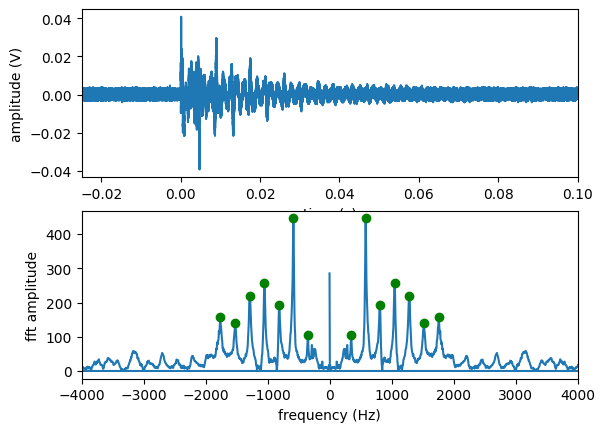

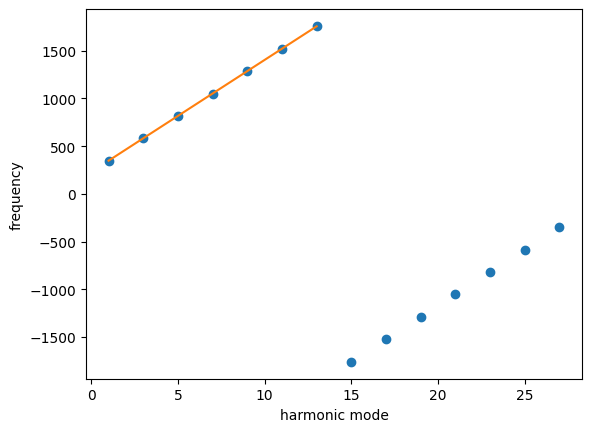

In [ ]:
### SPEED OF SOUND
# cs = lambda*f
# lambda = 2*L/n

wave2 = np.loadtxt('wave-2.csv', delimiter=',', skiprows=21)
L = 0.720725
# L = 0.441325

wave2_t = wave2[:,0]
wave2_a = wave2[:,1]

fig1, ax = plt.subplots(2,1)
time_wave_ax = ax[0]
freq_wave_ax = ax[1]

time_wave_ax.plot(wave2_t, wave2_a)
time_wave_ax.set_xlabel('time (s)')
time_wave_ax.set_ylabel('amplitude (V)')
time_wave_ax.set_xlim([-0.025,0.1])

wave2_fft = fft.fft(wave2_a)
wave2_freq = fft.fftfreq(len(wave2_t), wave2_t[1]-wave2_t[0]) # in Hz

# find peaks

nstart = 0
nstop = 7

peak_freq2, _ = signal.find_peaks(np.abs(wave2_fft), prominence=80)
print(wave2_freq[peak_freq2[nstart:nstop]])
print(np.diff(wave2_freq[peak_freq2[nstart:nstop]]))

freq_wave_ax.plot(wave2_freq, np.abs(wave2_fft))
freq_wave_ax.plot(wave2_freq[peak_freq2], np.abs(wave2_fft[peak_freq2]), 'go')
freq_wave_ax.set_xlim([-4000,4000])
freq_wave_ax.set_xlabel('frequency (Hz)')
freq_wave_ax.set_ylabel('fft amplitude')

# find speed of sound here by fitting harmonics
freqs = wave2_freq[peak_freq2]
# print(np.diff(wave_freq[peak_freq[0:12]]))
n = np.linspace(1, len(freqs), len(freqs))*2-1 # set according to what you see on the other plot and expected even/odd modes
print(n[0:7])

fig2, ax = plt.subplots()
ax.plot(n, freqs, 'o')

lin_fit = np.polyfit(n[nstart:nstop], freqs[nstart:nstop], 1)
print(lin_fit)
ax.plot(n[nstart:nstop], np.polyval(lin_fit, n[nstart:nstop]))
print("cs = ", 4*lin_fit[0]*L)
ax.set_xlabel('harmonic mode')
ax.set_ylabel('frequency')
# ax.set_xlim([ nstop])



## Comment on your results ##
Comment on your results and answer the discussion questions listed above.

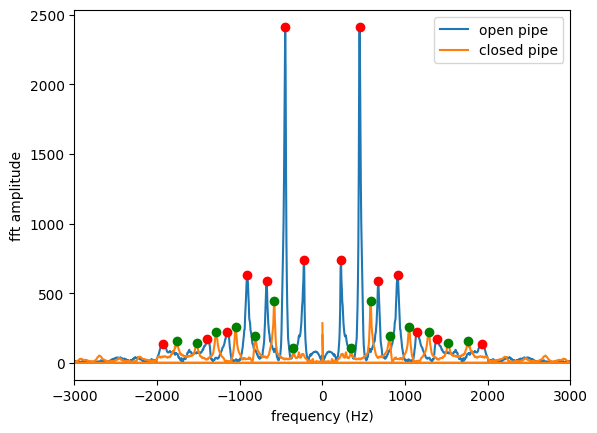

In [ ]:
# compare two FFTs

# wave-2.csv blocked one side of pipe
# wave-3.csv held in center
# wave-4.csv held at end hit at center
# 0001, 0002 different time steps?

wave = np.loadtxt('wave-1.csv', delimiter=',', skiprows=21)

wave_t = wave[:,0]
wave_a = wave[:,1]

# find t0
# t0ind = np.where(wave_t==8.16e-13)
# t0ind = t0ind[0][0]

# plt.plot(wave2_t, wave2_a)
# plt.xlabel('time (s)')
# plt.ylabel('amplitude (V)')
# plt.xlim([-0.025,0.1])

wave_fft = fft.fft(wave_a)
wave_freq = fft.fftfreq(len(wave_t), wave_t[1]-wave_t[0]) # in Hz

# find peaks
peak_freq, _ = signal.find_peaks(np.abs(wave_fft), prominence=80)
# print(wave2_freq[peak_freq2[0:7]])
# print(np.diff(wave2_freq[peak_freq2[0:7]]))

plt.plot(wave_freq, np.abs(wave_fft), label='open pipe')
plt.plot(wave_freq[peak_freq], np.abs(wave_fft[peak_freq]), 'ro')
plt.plot(wave2_freq, np.abs(wave2_fft), label='closed pipe')
plt.plot(wave2_freq[peak_freq2], np.abs(wave2_fft[peak_freq2]), 'go')

plt.xlim([-3000,3000])
plt.xlabel('frequency (Hz)')
plt.ylabel('fft amplitude')
plt.legend()